In [1]:
import pandas as pd
from pathlib import Path

# Load the data
nfl_data_path = Path("nfl_combined_2023&2022.csv")
nfl_data = pd.read_csv(nfl_data_path, delimiter='\t')

# Inspect the first few rows of the DataFrame
print(nfl_data.head())

             name   qbr   paa  plays   epa  pass  run  sack  pen   raw  \
0  Baker Mayfield  51.9   4.9    511  47.4  40.4  3.6  -9.2  3.4  53.4   
1      Derek Carr  47.7  -1.2    459  37.6  42.9 -5.2  -9.9 -0.1  49.1   
2     Davis Mills  35.0 -23.3    573  24.8  23.1 -1.2 -12.7  2.9  36.0   
3    Dak Prescott  59.9  16.7    480  56.6  48.5  5.3  -8.3  2.7  62.0   
4      Jared Goff  60.3  15.4    489  50.2  49.0 -1.0  -7.2  2.3  60.9   

   Average Salary  
0        37955071  
1        35150681  
2        15000000  
3       121500000  
4       160000000  


In [2]:
# Check for missing values
print(nfl_data.isnull().sum())

# Selecting features and the target variable
X = nfl_data.drop(['name', 'Average Salary'], axis=1)  # Drop non-numeric and target variable
y = nfl_data['Average Salary']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

name              0
qbr               0
paa               0
plays             0
epa               0
pass              0
run               0
sack              0
pen               0
raw               0
Average Salary    0
dtype: int64


In [3]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
regressor = RandomForestRegressor(random_state=42)

# Train the model
regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = regressor.predict(X_test_scaled)

# Calculate the metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 7023308725352305.0
R^2 Score: 0.7052068374728309


In [5]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 83805183.16519752


In [6]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 83805183.16519752


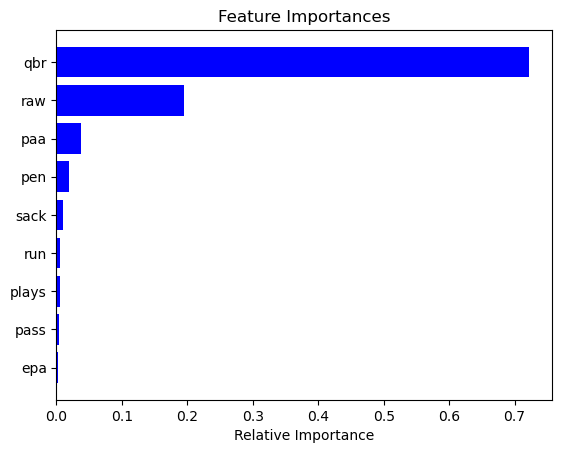

In [7]:
import matplotlib.pyplot as plt

feature_importances = regressor.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}


In [9]:
# Rebuild the model with the best parameters
best_regressor = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_regressor.fit(X_train_scaled, y_train)

# Make predictions with the optimized model
y_pred_optimized = best_regressor.predict(X_test_scaled)

# Evaluate the optimized model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Mean Squared Error: {mse_optimized}")
print(f"Optimized Root Mean Squared Error: {rmse_optimized}")
print(f"Optimized R^2 Score: {r2_optimized}")

Optimized Mean Squared Error: 6971152947546529.0
Optimized Root Mean Squared Error: 83493430.56520392
Optimized R^2 Score: 0.7073960003424522


In [10]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(best_regressor, X_train_scaled, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-validation scores: [0.72429159 0.69531099 0.85134863 0.89644645 0.85343157]
Mean CV Score: 0.8041658458014883


In [11]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_regressor, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE for each fold
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE Score:", np.mean(cv_rmse_scores))

Cross-validation RMSE scores: [36985163.53771878 43716736.63325522 36023697.69896435 33873298.68780559
 28257091.69677117]
Mean CV RMSE Score: 35771197.650903024


In [12]:
# Evaluate the model on the training set
y_train_pred = best_regressor.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error: {mse_train}")
print(f"Training Root Mean Squared Error: {rmse_train}")
print(f"Training R^2 Score: {r2_train}")

Training Mean Squared Error: 152629295374740.22
Training Root Mean Squared Error: 12354322.942789711
Training R^2 Score: 0.9801896866064169


In [13]:
# Evaluate the model on the training set
y_train_pred = best_regressor.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error: {mse_train}")
print(f"Training Root Mean Squared Error: {rmse_train}")
print(f"Training R^2 Score: {r2_train}")

Training Mean Squared Error: 152629295374740.22
Training Root Mean Squared Error: 12354322.942789711
Training R^2 Score: 0.9801896866064169


In [14]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
# Predict on the test set
y_pred_linear = linear_regressor.predict(X_test_scaled)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Mean Squared Error: {mse_linear}")
print(f"Linear Regression Root Mean Squared Error: {rmse_linear}")
print(f"Linear Regression R^2 Score: {r2_linear}")

Linear Regression Mean Squared Error: 7553289895101951.0
Linear Regression Root Mean Squared Error: 86909665.14204246
Linear Regression R^2 Score: 0.6829616491691501


In [16]:
# Print model coefficients
print(f"Coefficients: {linear_regressor.coef_}")
print(f"Intercept: {linear_regressor.intercept_}")

Coefficients: [ 2.17573169e+07  1.56931392e+07 -6.26789475e+07  3.44221289e+09
 -2.86589302e+09 -1.59372754e+09  8.30362897e+06 -1.98240199e+08
 -2.23102957e+07]
Intercept: 105054408.2916654


In [17]:
# Cross-validation
cv_scores_linear = cross_val_score(linear_regressor, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE for each fold
cv_rmse_scores_linear = np.sqrt(-cv_scores_linear)
print("Linear Regression Cross-validation RMSE scores:", cv_rmse_scores_linear)
print("Linear Regression Mean CV RMSE Score:", np.mean(cv_rmse_scores_linear))

Linear Regression Cross-validation RMSE scores: [51589155.98395161 42792176.6021961  52726896.31063572 61683359.18834733
 43863546.81810905]
Linear Regression Mean CV RMSE Score: 50531026.98064796
